In [1]:
from skimage.io import imread
from skimage.io import imshow
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

In [4]:
happy = []
for file in os.listdir('happy/'):
    im = imread(os.path.join('happy/', file),True)
    im = np.reshape(im,im.shape[0]*im.shape[1])
    happy.append(im)

surprise = []
for file in os.listdir('surprise/'):
    im = imread(os.path.join('surprise/', file),True)
    im = np.reshape(im,im.shape[0]*im.shape[1])
    surprise.append(im)

np.random.shuffle(happy)
tr1 = happy[0:50]
ts1 = happy[50:]
np.random.shuffle(surprise)
tr2 = surprise[0:50]
ts2 = surprise[50:]

train = tr1+tr2
test = ts1+ts2

X_train = np.array(train)
X_test = np.array(test)

y_train = np.concatenate((np.ones(50),np.zeros(50)))
y_test = np.concatenate((np.ones(35) ,np.zeros(38)))

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 180000)
(73, 180000)
(100,)
(73,)


In [52]:
test_score = []
test_knn_1 = []
test_knn_3 = []
test_knn_5 = []

train_score = []
train_knn_1 = []
train_knn_3 = []
train_knn_5 = []

for i in range(20):
    pca = PCA(n_components = (i + 1)*5)
    pca.fit(X_train)
    new_train = pca.transform(X_train)
    new_test = pca.transform(X_test)
    
    lda = LinearDiscriminantAnalysis()
    lda.fit(new_train , y_train)
    lda_coef = lda.coef_
    
    y_test_pred = lda.predict(new_test)
    y_train_pred = lda.predict(new_train)
    
    test_score.append(lda.score(new_test , y_test))
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(new_train , y_train)
    test_knn_1.append(knn.score(new_test , y_test))
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(new_train , y_train)
    test_knn_3.append(knn.score(new_test , y_test))
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(new_train , y_train)
    test_knn_5.append(knn.score(new_test , y_test))
    
    
    train_score.append(lda.score(new_train , y_train))
    
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(new_train , y_train)
    train_knn_1.append(knn.score(new_train , y_train))
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(new_train , y_train)
    train_knn_3.append(knn.score(new_train , y_train))
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(new_train , y_train)
    train_knn_5.append(knn.score(new_train , y_train))

In [53]:
print('Scores =', score)
n_comp = (np.argmax(score) + 1)*5 
print('Best number of components =', n_comp)

Scores = [0.5205479452054794, 0.9726027397260274, 0.9863013698630136, 0.9863013698630136, 0.9863013698630136, 0.9863013698630136, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9863013698630136, 0.9863013698630136, 1.0, 1.0, 0.9863013698630136, 1.0, 1.0, 1.0, 0.5068493150684932]
Best number of components = 35


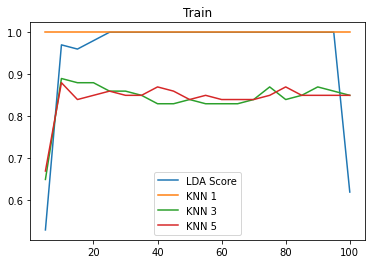

In [54]:
plt.plot((np.arange(20)+1)*5, train_score)
plt.plot((np.arange(20)+1)*5, train_knn_1)
plt.plot((np.arange(20)+1)*5, train_knn_3)
plt.plot((np.arange(20)+1)*5, train_knn_5)
plt.legend(['LDA Score', 'KNN 1', 'KNN 3', 'KNN 5'])
plt.title('Train')
plt.show()

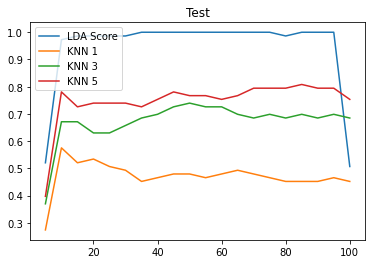

In [55]:
plt.plot((np.arange(20)+1)*5, test_score)
plt.plot((np.arange(20)+1)*5, test_knn_1)
plt.plot((np.arange(20)+1)*5, test_knn_3)
plt.plot((np.arange(20)+1)*5, test_knn_5)
plt.legend(['LDA Score', 'KNN 1', 'KNN 3', 'KNN 5'])
plt.title('Test')
plt.show()

In [63]:
pca = PCA(n_components = n_comp)
pca.fit(X_train)
new_train = pca.transform(X_train)
new_test = pca.transform(X_test)

print(new_train.shape)
print(new_test.shape)


(100, 35)
(73, 35)


In [64]:
lda = LinearDiscriminantAnalysis()
lda.fit(new_train , y_train)
lda_coef = lda.coef_
print(lda_coef.shape)
print(lda_coef)

(1, 35)
[[-3.48277532e-06  1.12664558e-04 -2.14770333e-06  3.86155719e-04
   9.82602343e-05  8.68640602e-04  2.46590933e-03  9.29789677e-04
  -1.60165762e-05 -5.50110209e-04  5.36497256e-04 -1.81816238e-04
  -4.87513320e-04 -5.02484042e-04  2.85110481e-04  6.85189193e-04
  -1.51514274e-04  5.13893440e-04  2.42170202e-04 -2.91307819e-04
  -2.89397486e-04  5.56848317e-05 -2.41207927e-05  2.41829912e-04
  -1.04265522e-04  2.41979941e-04 -2.43429690e-04  1.03804141e-04
  -5.81912339e-04 -6.45152614e-04 -7.93980382e-04 -3.43949885e-04
   7.27926996e-04  4.51396010e-04  2.62062235e-04]]


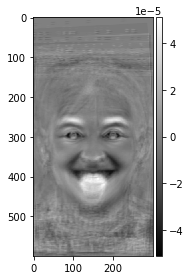

In [46]:
components = pca.components_
image = np.reshape(np.matmul(lda_coef,components) , (600,300))
imshow(image ,cmap = 'gray')

In [48]:
y_test_pred = lda.predict(new_test)
y_train_pred = lda.predict(new_train)
print(f'Train Mean squared error: {mean_squared_error(y_train , y_train_pred)}')
print(f'Test Mean squared error: {mean_squared_error(y_test , y_test_pred)}')
print(f'Score: {lda.score(new_test , y_test)}')

Train Mean squared error: 0.0
Test Mean squared error: 0.0
Score: 1.0


In [40]:
knn_score = []
knn_train_mean_square_error = []
knn_test_mean_square_error = []

for k in range(1,15,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    y_s = knn.predict(X_train)
    print(f'k = {k}')
    print(f'Train Mean squared error: {mean_squared_error(y_train , y_s)}')
    print(f'Test Mean squared error: {mean_squared_error(y_test , y_pred)}')
    print(f'Score: {knn.score(X_test , y_test)}\n')

k = 1
Train Mean squared error: 0.0
Test Mean squared error: 0.547945205479452
Score: 0.4520547945205479

k = 3
Train Mean squared error: 0.15
Test Mean squared error: 0.3150684931506849
Score: 0.684931506849315

k = 5
Train Mean squared error: 0.15
Test Mean squared error: 0.2465753424657534
Score: 0.7534246575342466

k = 7
Train Mean squared error: 0.12
Test Mean squared error: 0.2054794520547945
Score: 0.7945205479452054

k = 9
Train Mean squared error: 0.16
Test Mean squared error: 0.2328767123287671
Score: 0.7671232876712328

k = 11
Train Mean squared error: 0.16
Test Mean squared error: 0.2054794520547945
Score: 0.7945205479452054

k = 13
Train Mean squared error: 0.19
Test Mean squared error: 0.2054794520547945
Score: 0.7945205479452054

